# Financial_Risk_Prediction

In this project we will build a basic machine learning model to predict the risk analysis and how the data is used to minimize the risk of losing money while lending to customers

# Importing necessary libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

# Loading the dataset

In [21]:
df=pd.read_csv('previous_application.csv')
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(df.shape)

(1670214, 37)


In [11]:
df.isnull().sum()  # checking missing values

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [12]:
df.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [20]:
df2=pd.read_csv('application_data.csv')
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df2.shape

(307511, 122)

In [16]:
df2.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [17]:
df.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [18]:
df3=pd.read_csv('columns_description.csv')

In [19]:
df3.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


# Data Integration

Unified dataset from df1 and df3 can be used for later analysis 

In [22]:
merged_df =pd.merge(df2,df[['SK_ID_CURR','NFLAG_INSURED_ON_APPROVAL']], how='inner',on='SK_ID_CURR', suffixes=('','y'))
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data preprocessing 

In [26]:

#Handling missing values
missing_value_df= merged_df.copy()

#Change 'NFLAG_INSURED_ON_APPROVAL' from binary into 'yes' and 'no' to apply most_frequent imputation

binary_values= missing_value_df['NFLAG_INSURED_ON_APPROVAL']
label_encoder= LabelEncoder()
encoded_values=label_encoder.fit_transform(binary_values)



decoded_values=[]
for value in encoded_values:
    if value==1:
        decoded_values.append('Y')
    elif value==0:
        decoded_values.append('N')
    else:
        decoded_values.append(np.nan)
        


#replace binary values with categorical decoded values in 'NFLAG_INSURED_ON_APPROVAL' dataframe
missing_value_df['NFLAG_INSURED_ON_APPROVAL']=decoded_values



In [29]:
#strategy: Apply imputation; mean for numeric and most_frequesnt for catagorical features

numeric_columns= missing_value_df.select_dtypes(include=[np.number]).columns    #These are numeric columns
categorical_columns = missing_value_df.select_dtypes(include=[object]).columns  #These are a catagorical column

imputer_numeric= SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

missing_value_df[numeric_columns]= imputer_numeric.fit_transform(missing_value_df[numeric_columns])
missing_value_df[categorical_columns]= imputer_categorical.fit_transform(missing_value_df[categorical_columns])


In [30]:


#Encoding 'previous_application.csv'
encoded_df= missing_value_df.copy()

# Encoding different columns (With label encoder)
label_enc=['NAME_CONTRACT_TYPE','NFLAG_INSURED_ON_APPROVAL','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']
label_encoder = LabelEncoder()

for column in label_enc:
    encoded_value= label_encoder.fit_transform(encoded_df[column])
    encoded_df[column]= encoded_value


In [31]:


#Encoding 'previous_application.csv'
encoded_df= missing_value_df.copy()

# Encoding different columns (With label encoder)
label_enc=['NAME_CONTRACT_TYPE','NFLAG_INSURED_ON_APPROVAL','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']
label_encoder = LabelEncoder()

for column in label_enc:
    encoded_value= label_encoder.fit_transform(encoded_df[column])
    encoded_df[column]= encoded_value

#Encoding different columns (with ordinal encoder)
display(encoded_df.head()) 
all_mapping={'WEEKDAY_APPR_PROCESS_START':{'MONDAY':0, 'TUESDAY':1, 'WEDNESDAY': 2, 'THURSDAY':3, 'FRIDAY':4, 'SATURDAY':5, 'SUNDAY':6},'CODE_GENDER':{'F':0,'M':1,'XNA':2},'FLAG_OWN_CAR':{'N':0,'Y':1},'FLAG_OWN_REALTY':{'N':0,'Y':1},'NAME_EDUCATION_TYPE':{'Lower secondary':0,'Secondary / secondary special':1,'Incomplete higher':2,'Higher education':3,'Academic degree':4},'EMERGENCYSTATE_MODE':{'No':0, 'Yes':1}}

for column in all_mapping:
    mapping = all_mapping[column]
    ordinal_encoder = OrdinalEncoder(categories =[list(mapping.keys())])
    encoded_df[column] = ordinal_encoder.fit_transform(encoded_df[[column]])
    
display(encoded_df.head())  


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL
0,100002.0,1.0,0,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,100003.0,0.0,0,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100003.0,0.0,0,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100003.0,0.0,0,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,100004.0,0.0,1,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL
0,100002.0,1.0,0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,100003.0,0.0,0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100003.0,0.0,0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100003.0,0.0,0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,100004.0,0.0,1,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


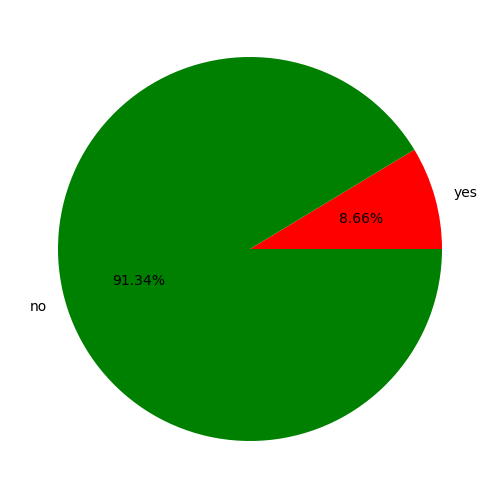

In [32]:
#Checking class imbalance for previous_data.csv

#Pie Chart
approval_counts = []

yes_count = 0
no_count = 0
for count in np.array(encoded_df['TARGET']):
    if count==1.0:
        yes_count+=1
        
approval_counts.append(yes_count)
            
for count in np.array(encoded_df['TARGET']):
        if count==0.0:
            no_count+=1
approval_counts.append(no_count)

fig= plt.figure()
ax=fig.add_axes([0,0,1,1])
loan_approval_label=['yes','no']
colors=['red','green']
ax.pie(approval_counts,labels= loan_approval_label, colors= colors,autopct='%1.2f%%' )
plt.show()



In [33]:
#Balancing classes

minority_class = encoded_df[encoded_df['TARGET']==1]
majority_class = encoded_df[encoded_df['TARGET']==0]

#Separation of minority and majority classes
majority_downsampled= resample(majority_class,
                            replace=False,
                            n_samples = len(minority_class), #matching the size of majority class
                            random_state=42)

#upsampling the minority class
downsampled_data=pd.concat([majority_downsampled,minority_class])

sorted_df= (downsampled_data.sort_index()).abs()  # sort_index() function sort rows by index and
                                                #abs()fuction put values in an absolute value to be positive
display(sorted_df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL
0,100002.0,1.0,0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0
6,100006.0,0.0,0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.006203,0.006817,0.038566,0.301373,0.361539,2.912612,0
14,100007.0,0.0,0,1.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
24,100008.0,0.0,0,1.0,0.0,1.0,0.0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0
32,100010.0,0.0,0,1.0,1.0,1.0,0.0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


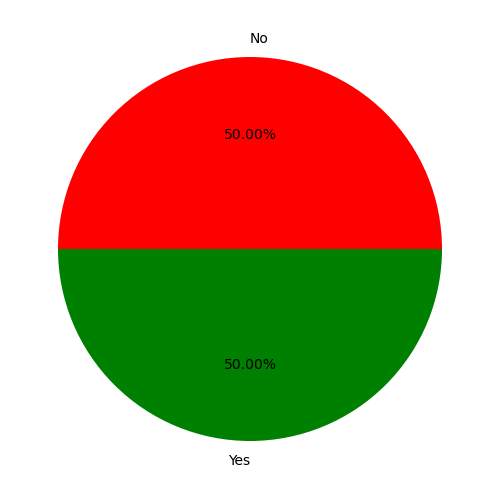

In [34]:
balanced= (sorted_df['TARGET'].value_counts()).to_dict()
approvals=[]
for count in balanced:
    approvals.append(balanced[count])

fig= plt.figure()
ax=fig.add_axes([0,0,1,1])
loan_approval_label=['No','Yes']
colors=['red','green']
ax.pie(approvals,labels= loan_approval_label, colors=colors,autopct='%1.2f%%')
plt.show()

# Feature Engineering

Select the features that are most relevant to the predicting loan difficulties

In [35]:

feature_names=sorted_df.columns[2:len(sorted_df)]
feature_values= []

for name in feature_names:
    feature_values.append(np.array(sorted_df[name]))
feature_data= (np.array(feature_values)).transpose()

target_data= np.array(sorted_df['TARGET'])
print(feature_data)
k=5
selector = SelectKBest(score_func= chi2, k=k)
new_feature= selector.fit_transform(feature_data, target_data)

selected_indices = selector.get_support(indices=True)
selected_features = [feature_names[i] for i in selected_indices]
    
print('The selected indices indices is/are: ', selected_indices,'\n')
print('The selected features is/are: ',selected_features)

[[0.         1.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.3615394  2.91261157 0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]]
The selected indices indices is/are:  [ 6  8 15 16 17] 

The selected features is/are:  ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']


# Model Selection

Use logistic regression model for predicting one value based on the another value

AMT_CREDIT: 3.079554330508861e-06
AMT_GOODS_PRICE: -3.49180838917368e-06
DAYS_BIRTH: 8.920537142946253e-06
DAYS_EMPLOYED: -1.2502936534588997e-06
DAYS_REGISTRATION: -2.0411378648447742e-05


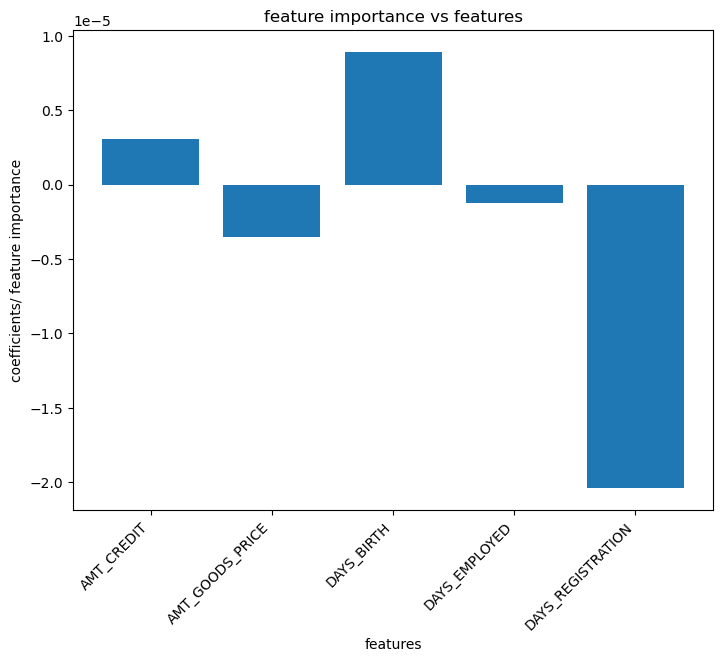

interpretation: 

1. Positive Coefficient: This suggests that the feature has a positive association with the likelihood of the positive outcome
2. Negative Coefficient: This suggests that the feature has a negative association with the likelihood of the negative outcome
3. Magnitude of the Coefficient: Indicates the strength of the relationship between the feature and the outcome


In [36]:
X= np.array(sorted_df[selected_features])
y=sorted_df['TARGET']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
logReg= LogisticRegression()
logReg.fit(X_train,y_train)
                           
coefficients=logReg.coef_[0]  #Getting the coefficients or feature importance
coefficients_names_zip= list(zip(selected_features,coefficients)) #Associate coefficients with feature names                                                                                                 

feature_list=[]
coefficient_list=[]

for feature, coefficient in coefficients_names_zip:
    print(f'{feature}: {coefficient}')
    feature_list.append(feature)
    coefficient_list.append(coefficient)
    
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(feature_list,coefficient_list)
ax.set_xlabel('features')
ax.set_ylabel('coefficients/ feature importance')
ax.set_title('feature importance vs features')

plt.xticks(rotation=45,ha='right')
plt.show()

print('interpretation: \n')
print('1. Positive Coefficient: This suggests that the feature has a positive association with the likelihood of the positive outcome')
print('2. Negative Coefficient: This suggests that the feature has a negative association with the likelihood of the negative outcome')
print('3. Magnitude of the Coefficient: Indicates the strength of the relationship between the feature and the outcome')

# Model Evaluation

Evaluating the model using metrics

In [37]:
# Using  Accuracy Score the evaluate the performance of the model
y_predict= logReg.predict(X_test)
accuracy= accuracy_score(y_test,y_predict)
precision= precision_score(y_test,y_predict)
f1= f1_score(y_test,y_predict)

print('The accuracy of the model is: ',accuracy)
print('The precision of the model is: ',precision)
print('The f1_score of the model is: ',f1)

The accuracy of the model is:  0.5658099051977771
The precision of the model is:  0.5692659363408954
The f1_score of the model is:  0.5540095280068836


In [39]:
#definining the hyper parameter grid for logistic regression

param_grid = {
    'penalty':['l2'],
     'C':[0.1,1,10]
}

#Performing grid search with cross-validation
grid_search = GridSearchCV(estimator= logReg, param_grid= param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print('Best score: ',  grid_search.best_score_)

best_model= grid_search.best_estimator_
accuracy2 = best_model.score(X_test, y_test)
print("Test Set Accuracy: ",accuracy2,'\n')

print('if the accuracy score does not change then in our case,' )
print('The selected hyperparameter grid for optimization does not include the optimal combination of hyperparametrs, i.e L1 or l1')

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Best score:  0.5592105161990403
Test Set Accuracy:  0.5658099051977771 

if the accuracy score does not change then in our case,
The selected hyperparameter grid for optimization does not include the optimal combination of hyperparametrs, i.e L1 or l1


In [40]:
new_predictions= best_model.predict(X_test)
target_response= (pd.DataFrame(new_predictions).value_counts()).to_dict()

for response in target_response:
    if  response==(0.0,):
        print(f'There are {target_response[response]} predicted clients without difficulties of loan payment')
    else:
        print(f'There are {target_response[response]} predicted clients with difficulties of loan payment')


There are 25758 predicted clients without difficulties of loan payment
There are 23186 predicted clients with difficulties of loan payment
